In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [57]:
#create random x and y points
num = 200
X = np.random.randint(100, size=num)
Y = np.random.randint(100, size=num)

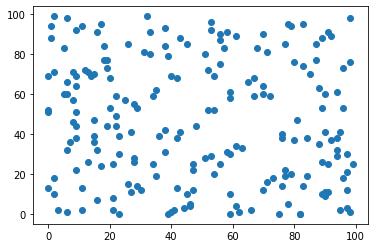

In [58]:
plt.scatter(x=X, y=Y)

In [59]:
#create a line function
def func(x):
    return x* 1.2 + 10

In [62]:
# classify points based on a line function, i.e. y if y is over the line and 0 if y is under the line

correct = [0]*num
for i, y in enumerate(Y):
    if y > func(X[i]):
        correct[i] = 1

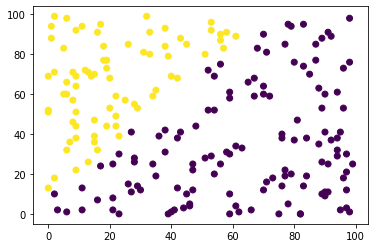

In [63]:
#display the correct answers
plt.scatter(x=X, y=Y, c=correct)

In [64]:
# create a perceptron object

class perceptron:
    def __init__(self, num_weights,  learningRate = 0.00001):
        self.learningRate = learningRate
        self.bias = 1
        self.weights = np.random.rand(num_weights, 1)
    def apply(self, inputs):
        activation = 0
        for i, value in enumerate(inputs):
            activation += value * self.weights[i] + self.bias
        if activation > 0:
            return True
        else:
            return False
    def activation(self, data):
        values = []
        for d in data:
            value = self.apply(d)
            values.append(value)
        return values
    def train(self, data, correct):
        for i, d in enumerate(data):
            activation = self.apply(inputs=d)
            error = correct[i]-activation
            if error != 0:
                for e, k in enumerate(d):
                    self.weights[e] += self.learningRate * error * k
        

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 291.59it/s]


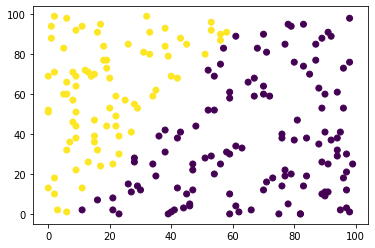

In [65]:
points = list(zip(X,Y))
p = perceptron(num_weights = 2)
for epoch in tqdm(range(1000)):
    p.train(points, correct=correct)

predictions = p.activation(data=points)
plt.scatter(x=X, y=Y, c=predictions)

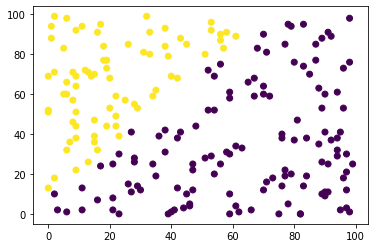

In [66]:
plt.scatter(x=X, y=Y, c=correct)